In [1]:
import shutil
import os
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

import cv2
from PIL import Image

In [69]:
def load_data_to_df(path):
    imgs = []
    paths = []
    breed  = []
    height, width = [], []

    for folder in tqdm(glob(path)):
        img = cv2.imread(folder)
        imgs.append(img)
        paths.append(folder)
        height.append(img.shape[0])
        width.append(img.shape[1])
        breed.append(folder.split("/")[3].split("-", 1)[1])
    df = pd.DataFrame({'img' : imgs, 'path': paths, 'breed': breed, 'height': height, 'width': width})
    return df

def copy_img(split_df, folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
    for i, path in tqdm(split_df["path"].items()):
        label_folder = os.path.join(folder, split_df.loc[i, "breed"])
        if not os.path.exists(label_folder):
            os.makedirs(label_folder)
        image_name = path.split(os.path.sep)[-1]
        destination = os.path.join(label_folder, image_name)
        shutil.copy(path, destination)

def plot_height_x_width(df, dataset: str):
    f, ax = plt.subplots(2, 1, figsize=(12, 12))
    ax[0].scatter(df.height, df.width, s=1)
    ax[0].set_xlabel('Height', fontsize=16)
    ax[0].set_ylabel('Width', fontsize=16)
    ax[0].set_title(f'Scatter Plot of Height and Width of dog {dataset} images')

    ax[1].hist(df.height, bins=50, alpha=0.5)
    ax[1].hist(df.width, bins=50, alpha=0.5)
    ax[1].axis([0, 1000, 0, 2000])
    ax[1].set_xlabel('Height/Width', fontsize=16)
    ax[1].set_ylabel('Num of Images', fontsize=16)
    ax[1].set_title(f'Variation of image sizes within {dataset} dataset')
    plt.show()

def grey_picture_plot(df):
    img_path = df["path"].values[0]
    f, ax = plt.subplots(2, 1, figsize=(12, 12))
    img = cv2.imread(img_path,0)
    imgfull = cv2.imread(img_path)
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist,bins = np.histogram(img.ravel(),256,[0,256])
    ax[0].hist(img.ravel(),256,[0,256])
    ax[0].set_title(f'Variation of image of black & white')
    ax[1].imshow(img, cmap = 'gray', interpolation = 'bicubic')
    ax[1].set_title(f'One channel image')
    f.suptitle(f"Breed : {df['breed'].values[0]}")
    plt.show()

def dist_breed(df, dataset :str):
    breed_df = df.copy()
    n_classes = len(breed_df['breed'].unique())

    breed_df['freq'] = breed_df.groupby('breed')['breed'].transform('count')
    avg = breed_df.freq.mean()

    title = f'Distribution of Dog Breeds in {dataset} Dataset\n ({avg:3.0f} samples per class on average)'
    f, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.set_xticks([])

    ax.hlines(avg, 0, n_classes - 1, color='white')
    ax.set_title(title, fontsize=18)
    _ = ax.hist(breed_df['breed'], bins=n_classes)
    print("-"*100, f"Distribution for {dataset}", breed_df["freq"].describe(), "-"*100, sep="\n")

def img_histogram(df):
    img_path = df["path"].values[0]
    f, ax = plt.subplots(2, 1, figsize=(12, 12))
    img = cv2.imread(img_path)
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        ax[0].plot(histr, color=col)
        ax[0].set_xlim([0,256])
        ax[0].set_title(f"Distribution of RGB")
    ax[1].imshow(Image.open(img_path).convert('RGB'))
    ax[1].set_title(f"Shape of the image : {img.shape}")
    f.suptitle(f"Breed : {df['breed'].values[0]}")
    plt.show()

In [ ]:
def plot_images(images):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap='bone')
        ax.axis('off')

In [3]:
df = load_data_to_df("../dataset/Images/*/*")

  0%|          | 0/20580 [00:00<?, ?it/s]

In [4]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImages(list_of_files, col=10, wSize=5, hSize=5, mypath='.'):
    fig = figure(figsize=(wSize, hSize))
    number_of_files = len(list_of_files)
    row = 10
    if (number_of_files % col != 0):
        row += 1
    for i in range(row+10):
        a=fig.add_subplot(row, col, i + 1)
        image = imread(list_of_files[i])
        imshow(image)
        axis('off')

def display_img(img_path):
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(cv_rgb)
    return imgplot

In [100]:
def img_hist(df_image):
    img = cv2.imread(df_image["path"].values[0])
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])

    print(df_image["breed"])
    print(img.shape)
    plt.show()
    #plt.imshow(img)
    display_img(df_image["path"].values[0])




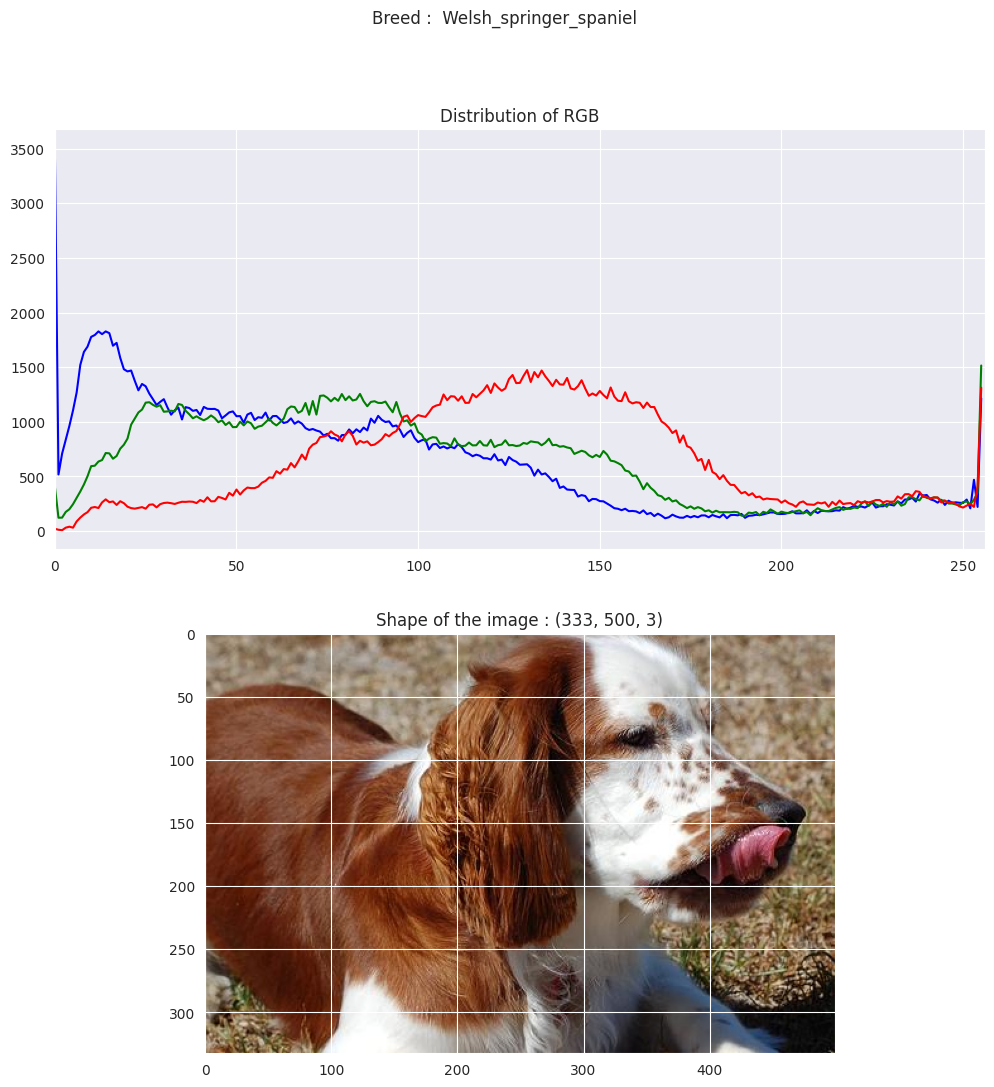

In [101]:
img_histogram(df.sample(1))

In [7]:
def img_show(img_path):
    # img_path = "../dataset/Images/n02085620-Chihuahua/n02085620_7.jpg"
    img =  Image.open(img_path).convert('RGB')
    return img

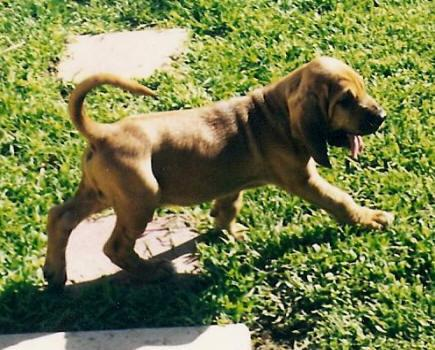

In [51]:
img_show(df["path"].sample(1).values[0])

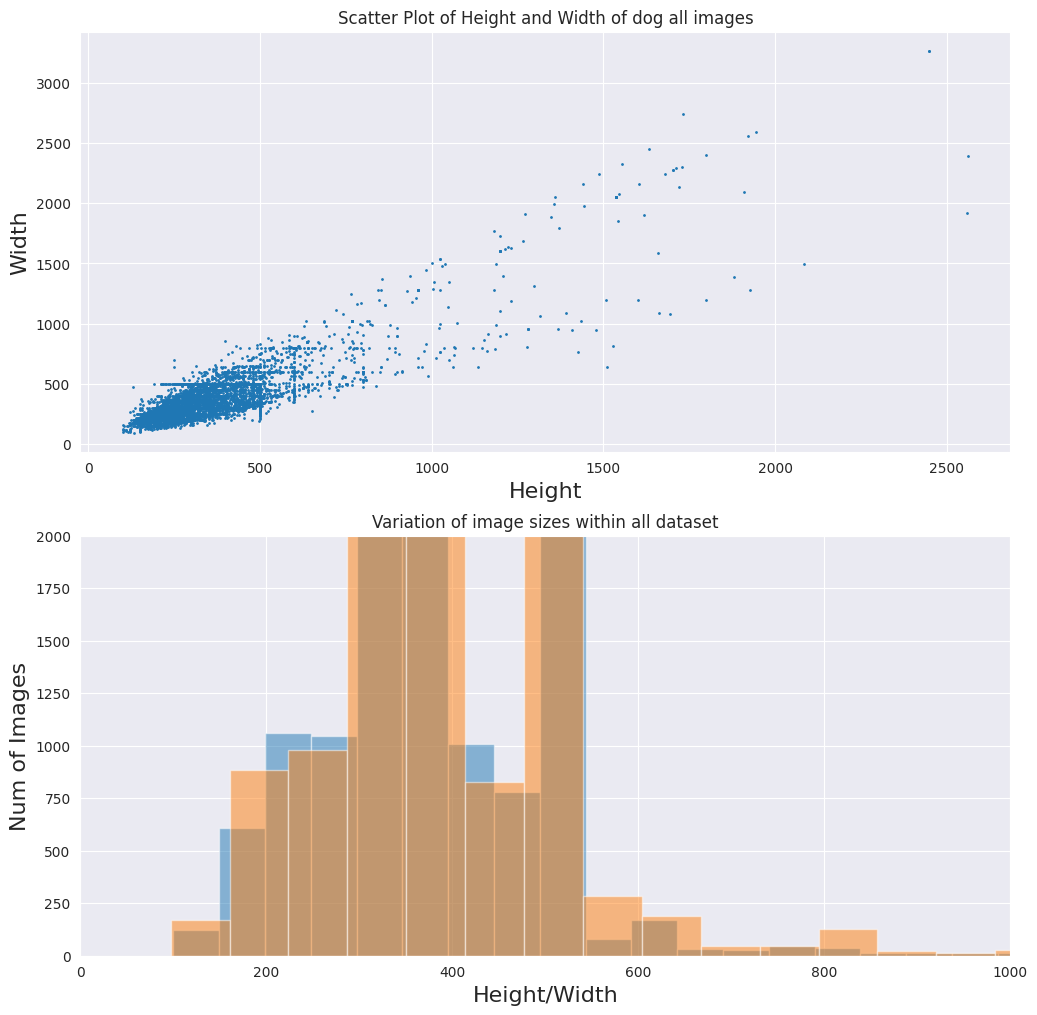

In [68]:
plot_height_x_width(df, "all")

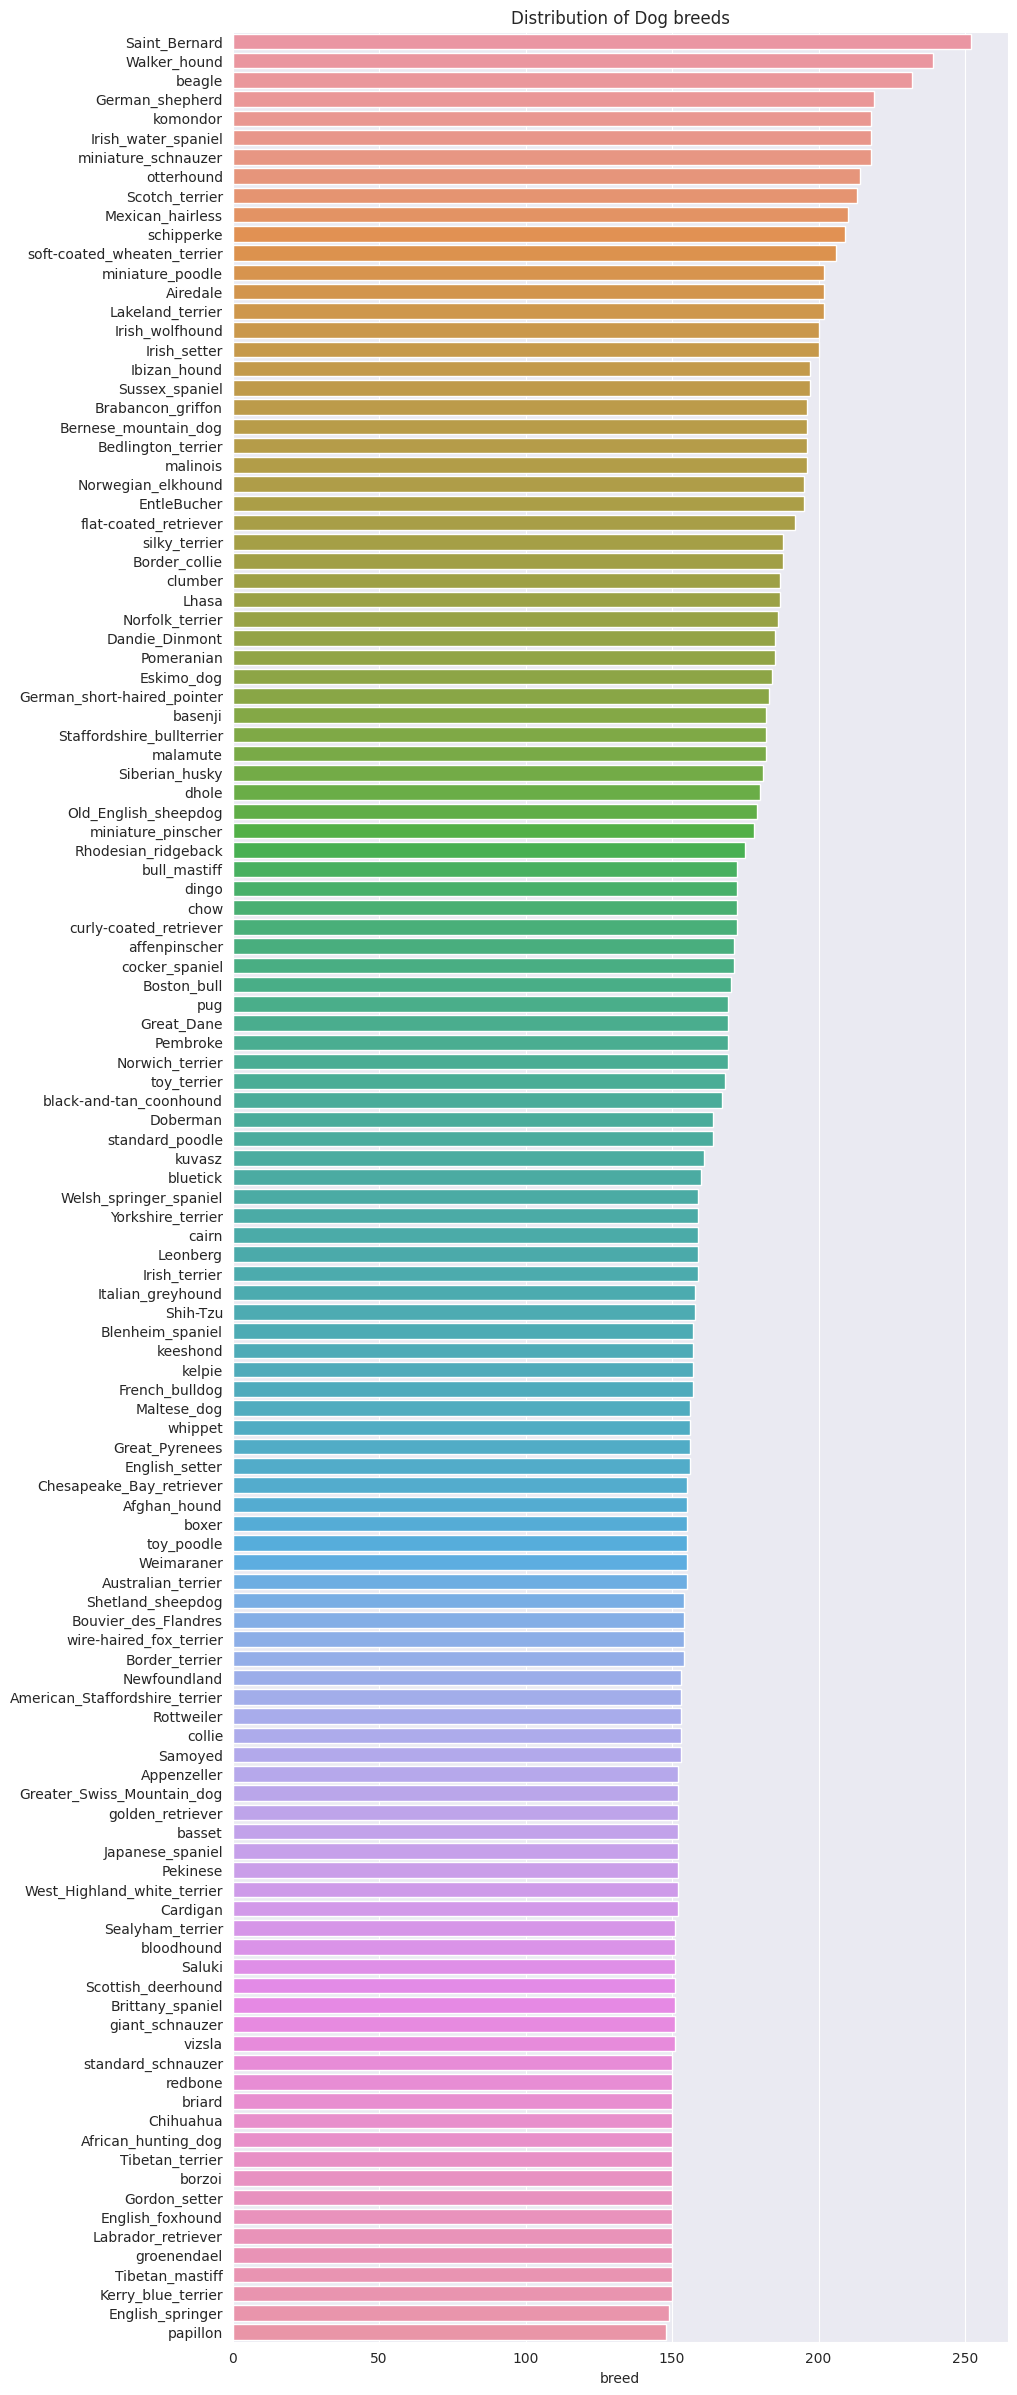

In [65]:
fig, ax = plt.subplots(figsize=(10,30))
ax.set_title('Distribution of Dog breeds')
sns.barplot(data=df, x=df["breed"].value_counts(), y=df["breed"].unique(), ax=ax)
plt.show()

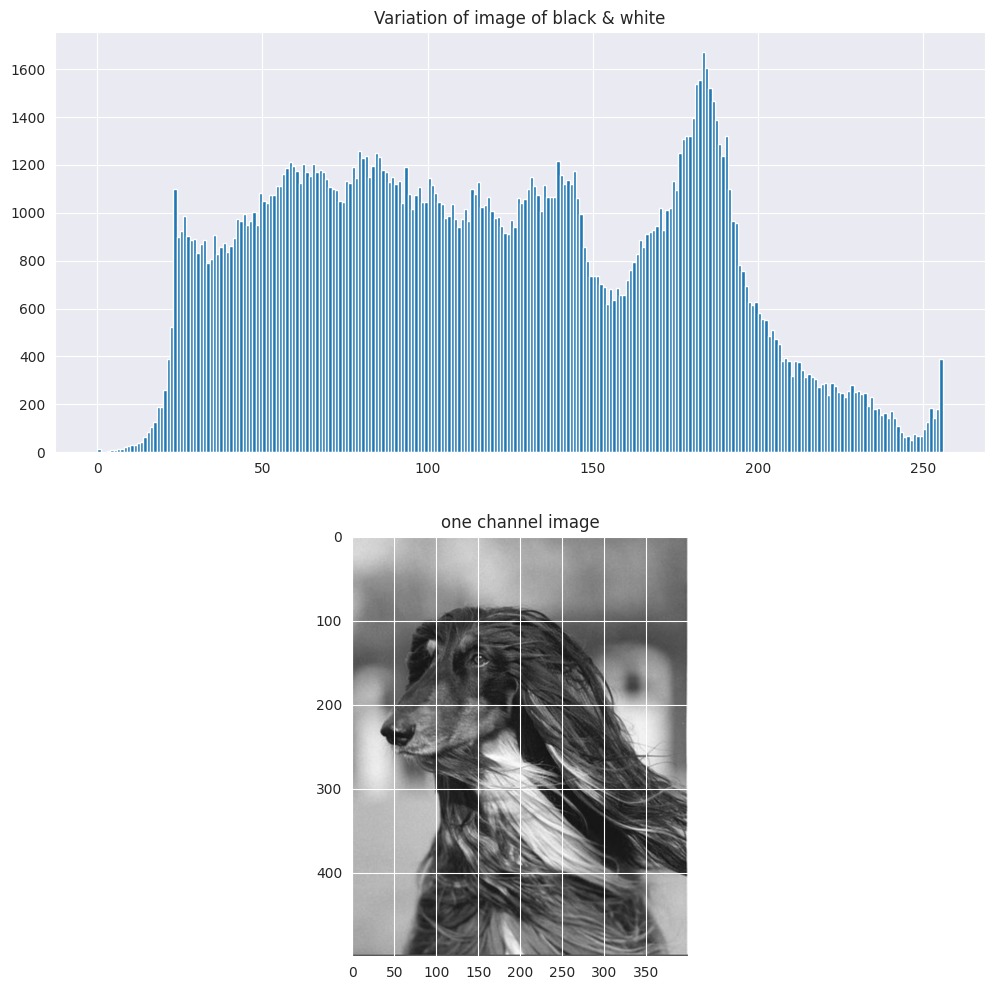

In [72]:
grey_picture_plot(df["path"].sample(1).values[0])

----------------------------------------------------------------------------------------------------
Distribution for all
count    20580.000000
mean       174.617881
std         24.602148
min        148.000000
25%        153.000000
50%        169.000000
75%        195.000000
max        252.000000
Name: freq, dtype: float64
----------------------------------------------------------------------------------------------------


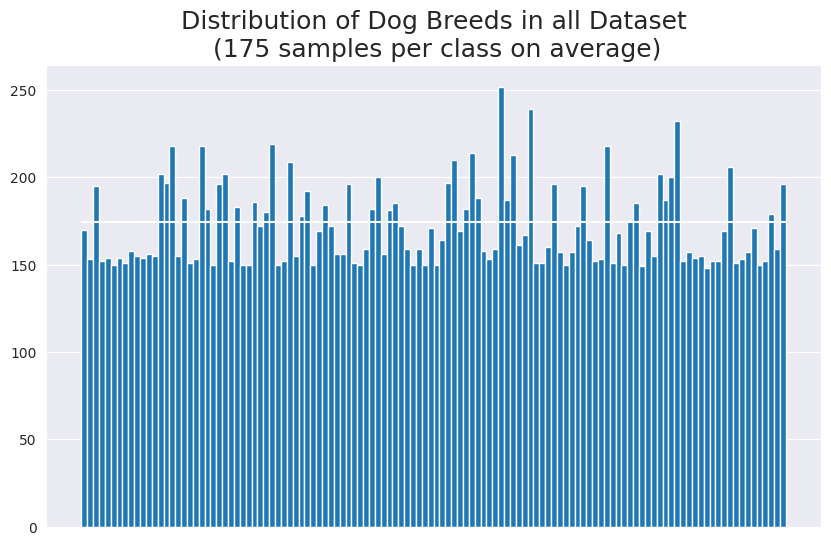

In [12]:
dist_breed(df, "all")

7376    bull_mastiff
Name: breed, dtype: object
(500, 333, 3)


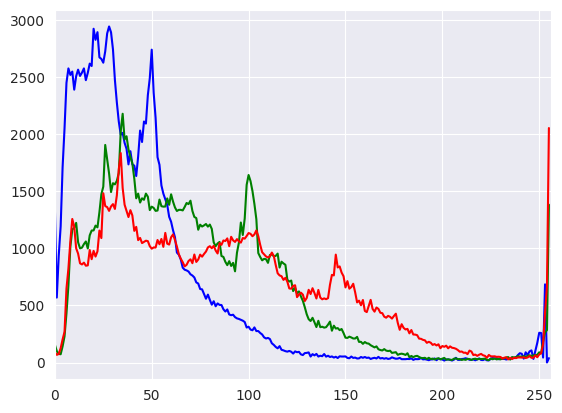

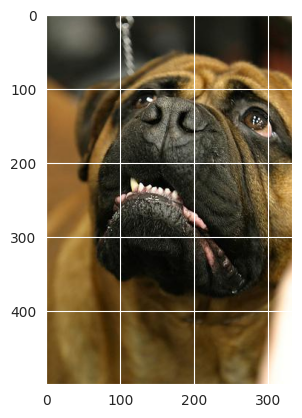

In [15]:
img_hist(df.sample(1))

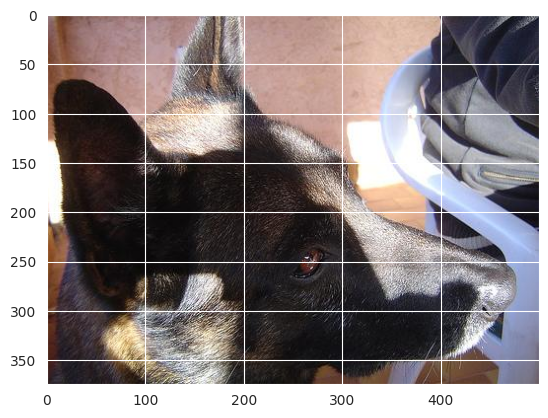

In [16]:
display_img(df["path"].sample(1).values[0])

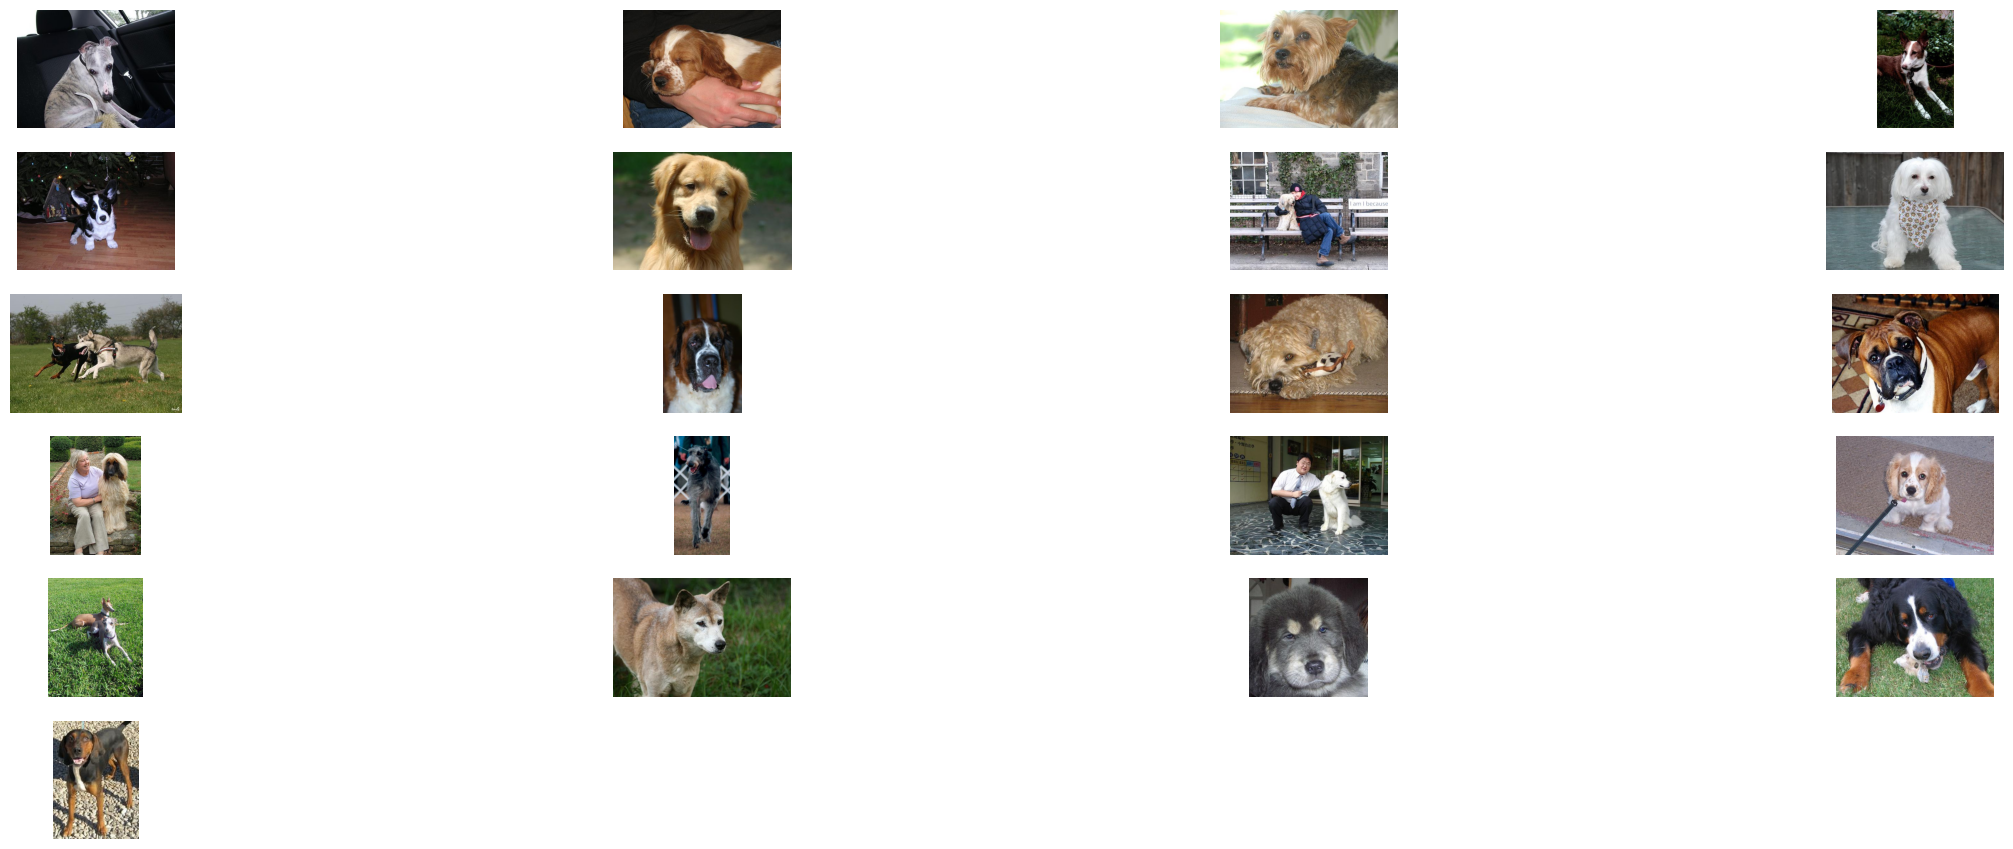

In [17]:
showImages(df["path"].sample(25).to_list(), wSize=30, hSize=20, col=4)